# CenterNet Tutorial

This notebook provides a tutorial for running inference on a static image in order to detect objects.
The implementation of the [CenterNetDetectorLearner](https://github.com/opendr-eu/opendr/blob/master/docs/reference/object-detection-2d-centernet.md) is largely copied from its original
[implementation](https://github.com/dmlc/gluon-cv/tree/master/scripts/detection/center_net).
More information on modifications and license can be found
[here](https://github.com/opendr-eu/opendr/blob/master/src/opendr/perception/object_detection_2d/centernet/README.md).

First, we need to import the learner and initialize it:

In [8]:
from opendr.perception.object_detection_2d import CenterNetDetectorLearner

learner = CenterNetDetectorLearner(device='cuda', backbone='resnet50_v1b')

Note that we can alter the device (e.g., 'cpu', 'cuda', etc.).

After creating our model, we need to download pre-trained weights.

In [9]:
learner.download(".")

and load our weights:

In [10]:
learner.load("./centernet_default", verbose=True)

Loaded mxnet model.


We will also download one sample image and load it, so we can use it in OpenDR for testing:

In [11]:
learner.download(".", mode="images")

from opendr.engine.data import Image
img = Image.open("./bicycles.jpg")

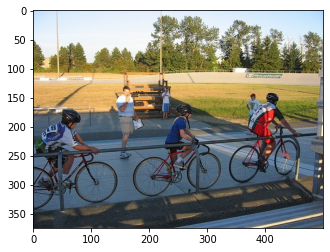

In [12]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img.opencv(), cv2.COLOR_BGR2RGB))

We are now ready to use our model!
The only thing that we have to do is to pass the image through the model.
Note that there are standard data types supported by OpenDR.
However, OpenDR also understands common data types (e.g,. OpenCV images) and automatically converts them into the most
appropriate format:

In [13]:
detections = learner.infer(img)

/home/administrator/opendr/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/administrator/opendr/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


We can plot the results using a utility function from the Object-Detection-2D module:

/home/administrator/opendr/src/opendr/perception/object_detection_2d/datasets/transforms.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bbox_np = np.asarray([bbox.left, bbox.top, bbox.left + bbox.width, bbox.top + bbox.height, bbox.confidence, bbox.name])


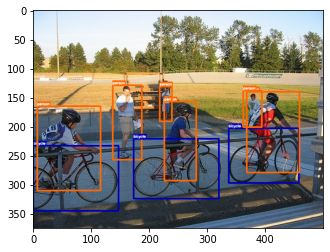

In [14]:
from opendr.perception.object_detection_2d import draw_bounding_boxes

img_annotated = draw_bounding_boxes(img.opencv(), detections, class_names=learner.classes, show=False)


%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB))